In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="titanic.png" style="zoom:30%;" />

#### 圖二
<img src="hist.png" style="zoom:100%;" />

## 讀取資料

In [51]:
titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [52]:
titanic.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace = True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

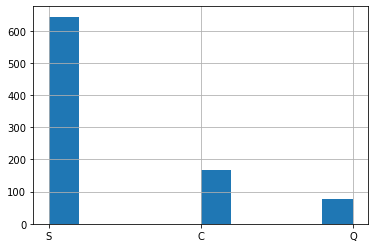

In [53]:
discrete = [f for f in titanic.columns if titanic.dtypes[f] == 'object']
# Embarked
titanic.Embarked.hist()
plt.show()

titanic.Embarked = titanic.Embarked.fillna('S')

In [54]:
continual = [f for f in titanic.columns if titanic.dtypes[f] != 'object']
titanic[continual] = titanic[continual].fillna(titanic[continual].mean())

## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [55]:
dummies = pd.get_dummies(titanic['Sex'], prefix = 'Sex')
titanic = pd.concat([titanic, dummies], axis = 1)
titanic.drop(columns = ['Sex'], inplace = True)

In [56]:
dummies = pd.get_dummies(titanic['Embarked'], prefix = 'Embarked')
titanic = pd.concat([titanic, dummies], axis = 1)
titanic.drop(columns = ['Embarked'], inplace = True)

In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


## 切分訓練集及測試集

In [59]:
split_idx = 713
target = 'Survived'

Train = titanic[: split_idx]
Test = titanic[split_idx: ]

y_train = np.asarray(Train[target], dtype = np.float64)
x_train = np.asarray(Train.drop(columns = [target]))

y_test = np.asarray(Test[target], dtype = np.float64)
x_test = np.asarray(Test.drop(columns = [target]))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(713, 10) (713,) (178, 10) (178,)


## Training

In [60]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [61]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       434
         1.0       0.99      0.96      0.98       279

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713


Testing report
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       115
         1.0       0.77      0.81      0.79        63

    accuracy                           0.85       178
   macro avg       0.83      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178

